In [1]:
pip install python-chess

     -------------------------------------- 154.4/154.4 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [319]:
import chess
import random
import numpy as np


random.seed(123)

def sim_game(nsim):
    result = np.zeros(nsim)
    for i in range(nsim):
        board = chess.Board()
        while not board.is_game_over():
            legal_moves = list(board.legal_moves)
            #print("Legal moves:", [move.uci() for move in legal_moves])
            #user_move = input("Enter your move (e.g., 'e2e4'): ")        
            try:
                ## User-generated move
                #move = chess.Move.from_uci(user_move)
                if board.legal_moves.count() == 0:
                    #print(board.result)
                    break
                ## Random user move
                #user_move = random.choice(list(board.legal_moves))
                ## Engine move
#                user_move = next_move(board)
                scenarios = next_move(board, 2, True)
                user_move = list(board.legal_moves)[minimax(scenarios, 2)[0]]
                #print(user_move)
                board.push(user_move)

                ## Make a random move for the computer
                if board.legal_moves.count() == 0:
                    #print(board.result)
                    break
                computer_move = random.choice(list(board.legal_moves))
                #print(computer_move)
                board.push(computer_move)
                #print("Computer's move:", computer_move.uci())
            except ValueError:
                user_move = random.choice(list(board.legal_moves))
                board.push(user_move)
                print("Invalid move format. Try again.")
        if board.result().partition('-')[0] == '1/2':
            result[i] = 0.5
        else:
            result[i] = board.result().partition('-')[0]
        if (i+1) % 1 == 0:
            print(f"Game {i+1} Result: {board.result()}")
    return np.mean(result)
    
sim_game(100)
#if __name__ == "__main__":
#    main()

Game 1 Result: 1-0
Game 2 Result: 1-0


KeyboardInterrupt: 

<LegalMoveGenerator at 0x1ffea1f1130 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

None


In [677]:
piece_values = {
    chess.PAWN: 1,
    chess.KNIGHT: 3,
    chess.BISHOP: 3,
    chess.ROOK: 5,
    chess.QUEEN: 9,
    chess.KING: 100
}

def score_board(board):
    score = 0
    ## Encourage putting the other king in check
    if board.is_check():
        score += 1
    if board.is_stalemate():
        return 0
    elif board.is_checkmate():
        return 10000
    ## Iterate over entire chessboard
    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece is not None:
            val = piece_values[piece.piece_type] + 0.1 * (8 - chess.square_manhattan_distance(square, chess.E5))
            if piece.color == chess.WHITE:
                score += val
            else:
                score -= val
    return score


def next_move(board, moves_ahead = 2, player = True):
    ## If no more moves, return the state of the board
    if moves_ahead == 0:
        return score_board(board)
    moves = board.legal_moves
    if board.legal_moves.count() == 0:
        if board.is_checkmate():
            return [10000]
        if board.is_stalemate():
            return [0]
    scores = []    
    ## Evaluate all possible next moves 
    for i in moves:
        board.push(i)
        #if moves_ahead == 1:
        #scores.append(score_board(board))
        #else:
        #print(board.is_stalemate())
        scores.append(next_move(board, moves_ahead - 1, not player))
        ## Undo move
        board.pop()
    return scores


def minimax(scenarios, depth, player = True):
    if depth == 2:
        losses = []
        for i in scenarios:
            losses.append(min(i))
        max_value = np.max(losses)
        max_indices = np.where(losses == max_value)[0]
        return [random.choice(max_indices), max_value]
    red_scenarios = []
    for i in range(len(scenarios)):
        slicer = []
        for j in range(len(scenarios[i])):
            slicer.append( minimax(scenarios[i][j], depth - 2, player)[1] )
            #print(scenarios[i][j])
        red_scenarios.append(slicer)
    return minimax(red_scenarios, depth - 2, player)   
            
            

In [313]:
scenarios = next_move(board, 2, True)
scenarios
#list(board.legal_moves)[minimax(scenarios[0][0], 2)[0]]
#for i in range(len(scenarios)):
#    for j in range(len(scenarios[i])):
#        losses = []
#        for k in scenarios[i][j]:
#            losses.append(min(k))
        #i = max(losses)
#        scenarios[i][j] = max(losses)
#        print(max(losses))
#scenarios
#losses = []
#for i in scenarios:
#    losses.append(min(i))
#max(losses)
#list(board.legal_moves)[minimax(scenarios, 2)[0]]

[[11.499999999999986, 11.399999999999991],
 [11.399999999999991, 11.299999999999997, 11.199999999999989],
 [11.499999999999986, 11.399999999999991, 11.299999999999983],
 [11.399999999999991, 11.299999999999997, 11.199999999999989],
 [11.4],
 [2.0],
 [0],
 [11.599999999999994],
 [11.400000000000006, 11.300000000000011, 11.400000000000006],
 [11.600000000000009],
 [11.599999999999994, 11.599999999999994],
 [11.400000000000006, 11.5],
 [11.400000000000006, 11.400000000000006],
 [11.299999999999997, 11.200000000000003],
 [11.599999999999994, 11.5, 11.599999999999994],
 [11.5, 11.400000000000006],
 [11.400000000000006, 11.300000000000011, 11.400000000000006],
 [11.300000000000011, 11.400000000000006],
 [11.400000000000006, 11.300000000000011],
 [11.200000000000003, 11.100000000000009, 11.200000000000003],
 [11.200000000000003, 11.100000000000009, 11.200000000000003],
 [11.299999999999997, 11.200000000000003],
 [11.0, 10.900000000000006, 11.0]]

In [309]:
board = chess.Board()
#board.push(chess.Move.from_uci('e2e4'))
#board.push(chess.Move.from_uci('c7c5'))
#board
board.clear()
# Place specific pieces on the board for a late-stage scenario
# Example: White has a King and a Pawn on e4, Black has a King on e6
board.set_piece_at(chess.E4, chess.Piece(chess.KING, chess.WHITE))
board.set_piece_at(chess.E5, chess.Piece(chess.PAWN, chess.WHITE))
board.set_piece_at(chess.E6, chess.Piece(chess.KING, chess.BLACK))
board.set_piece_at(chess.D4, chess.Piece(chess.QUEEN, chess.WHITE))
print(list(board.legal_moves)[6])
#board.push(chess.Move.from_uci('d4d6'))
#board.pop()
#board.legal_moves.count()
#list(board.legal_moves)

d4a7


In [328]:
## Calculate Elo score (Assuming random bot is 0, and -50 for white)
#print(np.log10(0.9800 / (1 - 0.9800)) * 400 - 50)
print(np.log10(0.6135 / (1 - 0.6135)) * 400 - 50)
#np.log10(0.1000 / (1 - 0.1000)) * 400 + 1050

30.266027523471763


In [678]:
board = chess.Board()

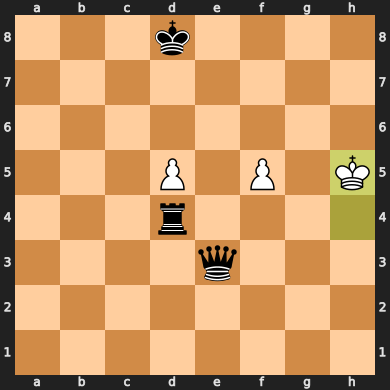

In [834]:
scenarios = next_move(board, 2, True)
user_move = list(board.legal_moves)[minimax(scenarios, 2)[0]]
#print(user_move)
board.push(user_move)
board

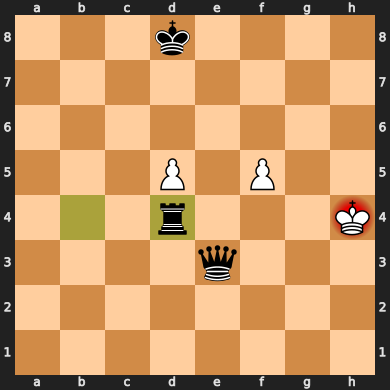

In [833]:
board.push(chess.Move.from_uci('b4d4'))
board

In [596]:
## Bot 1.0.1 history
## 96-4-0 against 0 Elo: 627
## 1-0 against 250 Elo: 629
## 1-0 against 400 Elo: 633
## 1-0 against 550 Elo: 641
## 1-1 against 700 Elo: 644